In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df= pd.read_csv('loanapprovalprediction.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
# Lets turn the dataset columns more meaningful,so its more readable and easier to understand and lets also set id as index
df.rename(columns={
    'id': 'Applicant_ID',
    'person_age': 'Applicant_Age',
    'person_income': 'Annual_Income',
    'person_home_ownership': 'Home_Ownership_Status',
    'person_emp_length': 'Employment_Length_Years',
    'loan_intent': 'Loan_Purpose',
    'loan_grade': 'Credit_Grade',
    'loan_amnt': 'Loan_Amount',
    'loan_int_rate': 'Loan_Interest_Rate',
    'loan_percent_income': 'Income_Percentage_Used_For_Loan',
    'cb_person_default_on_file': 'Default_Flag_Credit_Bureau',
    'cb_person_cred_hist_length': 'Credit_History_Length_Years',
    'loan_status': 'Loan_Default_Status'
}, inplace=True)
df.set_index('Applicant_ID',inplace=True)
df.head()

,Applicant_Age,Annual_Income,Home_Ownership_Status,Employment_Length_Years,Loan_Purpose,Credit_Grade,Loan_Amount,Loan_Interest_Rate,Income_Percentage_Used_For_Loan,Default_Flag_Credit_Bureau,Credit_History_Length_Years,Loan_Default_Status
Applicant_ID,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
#Now its more readable and easier to understand, lets proceed further by understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Age                    58645 non-null  int64  
 1   Annual_Income                    58645 non-null  int64  
 2   Home_Ownership_Status            58645 non-null  object 
 3   Employment_Length_Years          58645 non-null  float64
 4   Loan_Purpose                     58645 non-null  object 
 5   Credit_Grade                     58645 non-null  object 
 6   Loan_Amount                      58645 non-null  int64  
 7   Loan_Interest_Rate               58645 non-null  float64
 8   Income_Percentage_Used_For_Loan  58645 non-null  float64
 9   Default_Flag_Credit_Bureau       58645 non-null  object 
 10  Credit_History_Length_Years      58645 non-null  int64  
 11  Loan_Default_Status              58645 non-null  int64  
dtypes: float64(3), int64(5)

In [6]:
# we have total of 3 float variables, 5 int variables and 4 object variables

Applicant_Age                      0
Annual_Income                      0
Home_Ownership_Status              0
Employment_Length_Years            0
Loan_Purpose                       0
Credit_Grade                       0
Loan_Amount                        0
Loan_Interest_Rate                 0
Income_Percentage_Used_For_Loan    0
Default_Flag_Credit_Bureau         0
Credit_History_Length_Years        0
Loan_Default_Status                0
dtype: int64


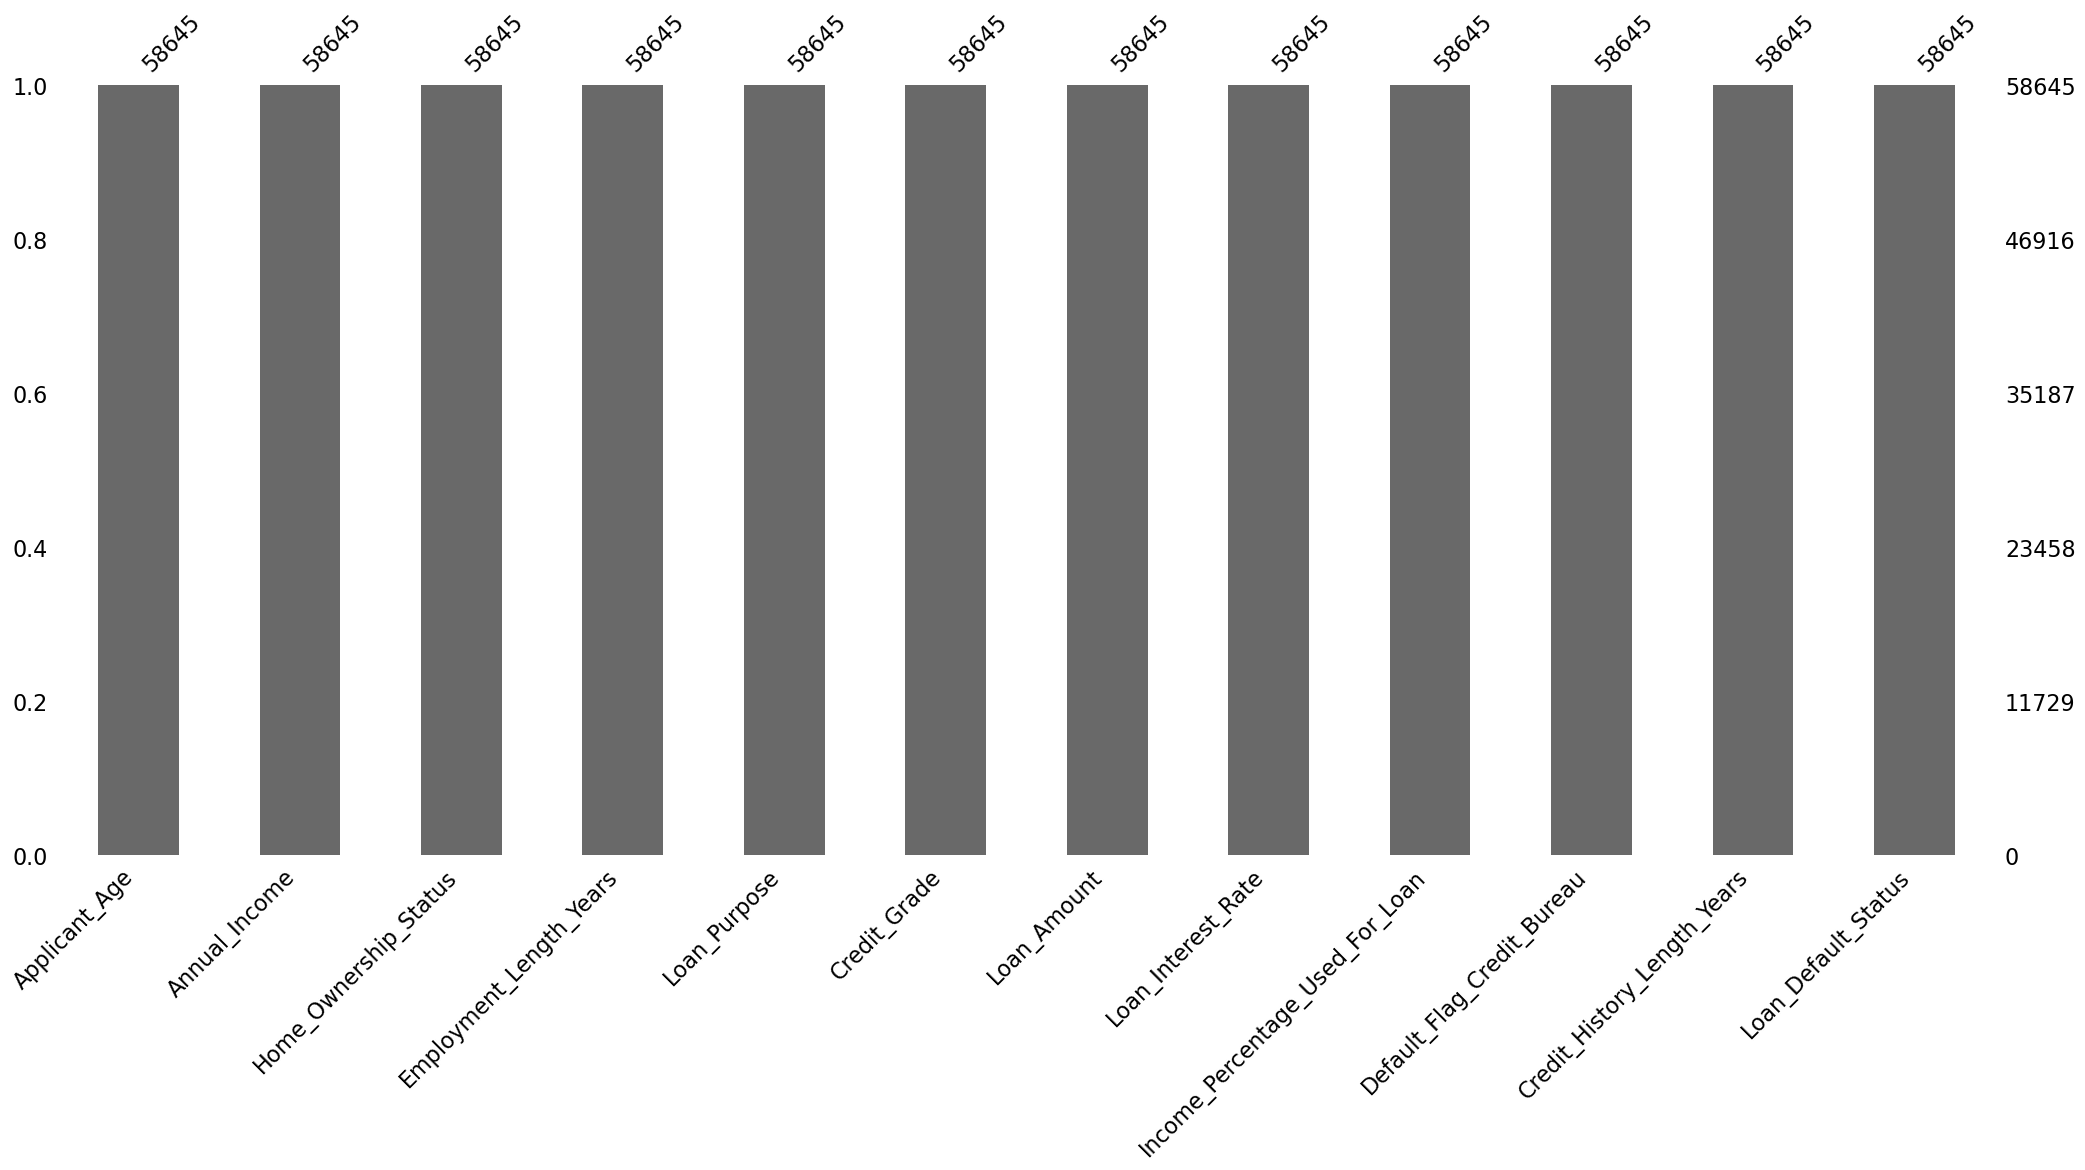

In [7]:
# Now lets check for any null values present in our data
print(df.isnull().sum()*100)
import missingno as msno
msno.bar(df)
plt.show()

In [8]:
# since we have no duplicate values, lets check for any duplicate rows or any anomalies 
df.duplicated().sum()

0

In [9]:
#There are no duplicate rows in our data, Moving on with anomalies
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
Annual_Income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
Employment_Length_Years,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
Loan_Amount,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
Loan_Interest_Rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
Income_Percentage_Used_For_Loan,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
Credit_History_Length_Years,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
Loan_Default_Status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [10]:
# Columns applicant_Age and Employment_length_years have an unrealistic values(123) where as 50% and 75% are normal
# lets try to analyze those values

In [11]:
df['Applicant_Age'].value_counts()

Applicant_Age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64

In [12]:
df['Employment_Length_Years'].value_counts()

Employment_Length_Years
0.0      7586
2.0      7270
3.0      6475
5.0      5839
4.0      5461
1.0      5203
6.0      4902
7.0      4275
8.0      3015
9.0      2290
11.0     1491
12.0     1105
10.0     1072
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
21.0       78
19.0       72
20.0       65
22.0       20
24.0       14
23.0       12
26.0       11
25.0        8
27.0        7
31.0        5
28.0        4
30.0        2
123.0       2
41.0        2
29.0        2
35.0        1
39.0        1
Name: count, dtype: int64

In [13]:
# since its just 3 rows with invalid entries i am proceeding by removing the rows
df.drop(df[df['Applicant_Age']== 123].index,inplace=True)
df.drop(df[df['Employment_Length_Years']== 123].index,inplace=True)

In [14]:
# Now lets check the shape of the data after removing rows with invalid values
print("The number of rows in our data is: ",df.shape[0])
print("The number of rows in our data is: ",df.shape[1])

The number of rows in our data is:  58642
The number of rows in our data is:  12


### UNIVARIATE ANALYSIS ON NUMERIC VARIABLES

In [15]:
# Now lets proceed further by splitting the data into category and numeric for additional analysis
num = df.select_dtypes(include= np.number).columns.to_list()
cat = df.select_dtypes(exclude= np.number).columns.to_list()
print(num)
print('-'*120)
print(cat)

['Applicant_Age', 'Annual_Income', 'Employment_Length_Years', 'Loan_Amount', 'Loan_Interest_Rate', 'Income_Percentage_Used_For_Loan', 'Credit_History_Length_Years', 'Loan_Default_Status']
------------------------------------------------------------------------------------------------------------------------
['Home_Ownership_Status', 'Loan_Purpose', 'Credit_Grade', 'Default_Flag_Credit_Bureau']


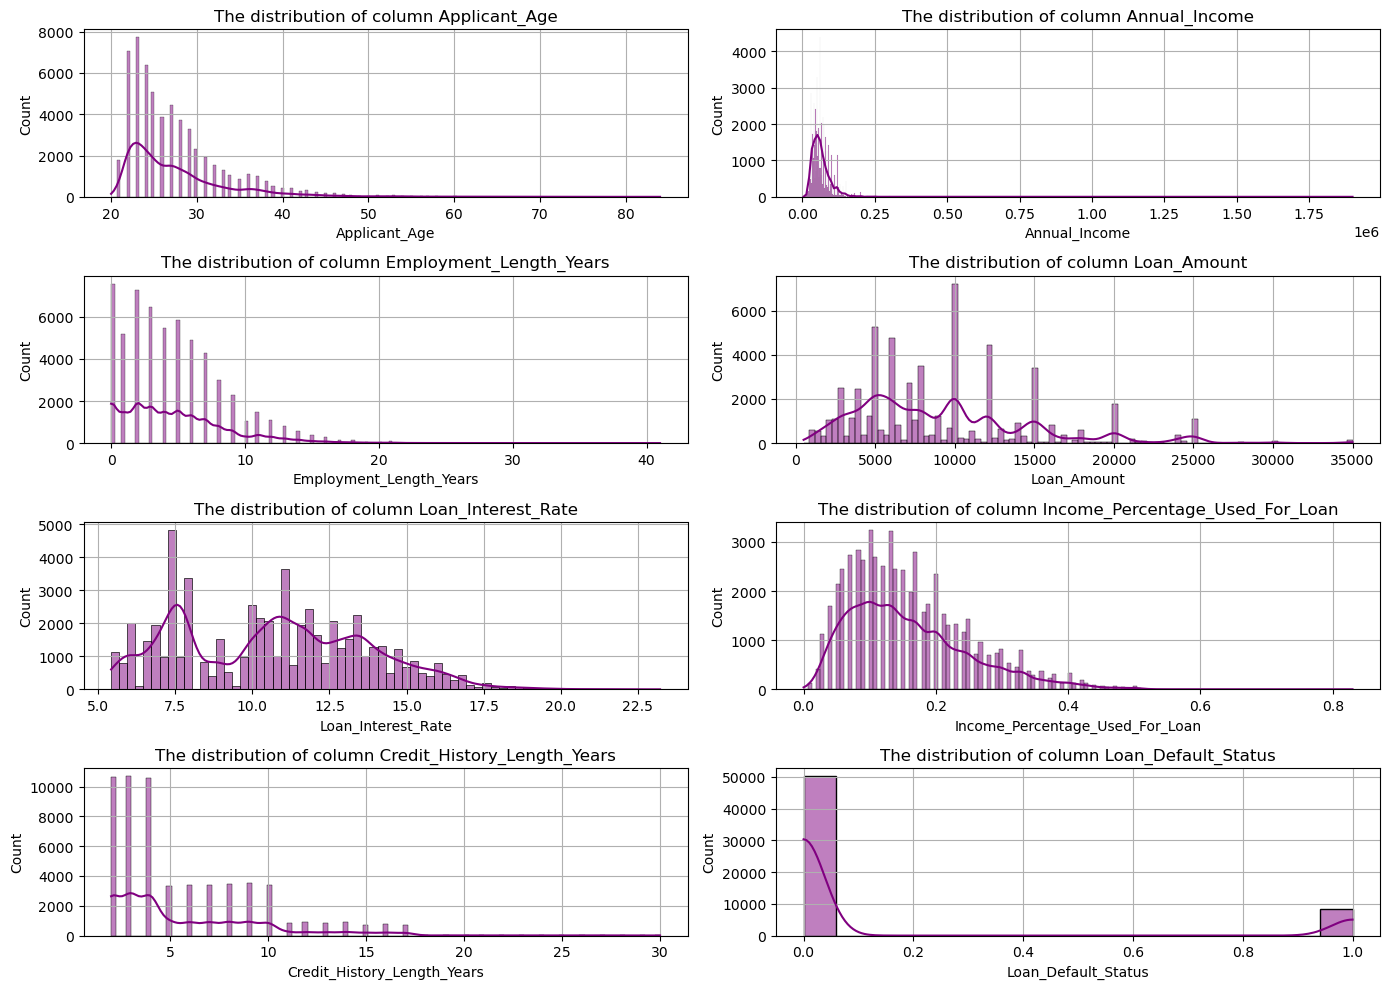

In [16]:
# lets check the distribution of our data by plotting a histogram on the numerical variables
plt.figure(figsize=(14,10))
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.histplot(x= df[i],kde=True,color='purple')
    plt.title(f"The distribution of column {i}")
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

- Many variables are skewed (right-skewed), indicating the need for transformations or handling outliers.
- The dataset has potential outliers in Applicant_Age, Annual_Income, Employment_Length_Years, and Income_Percentage_Used_For_Loan.
- Loan_Default_Status is highly imbalanced, requiring careful consideration during modeling.


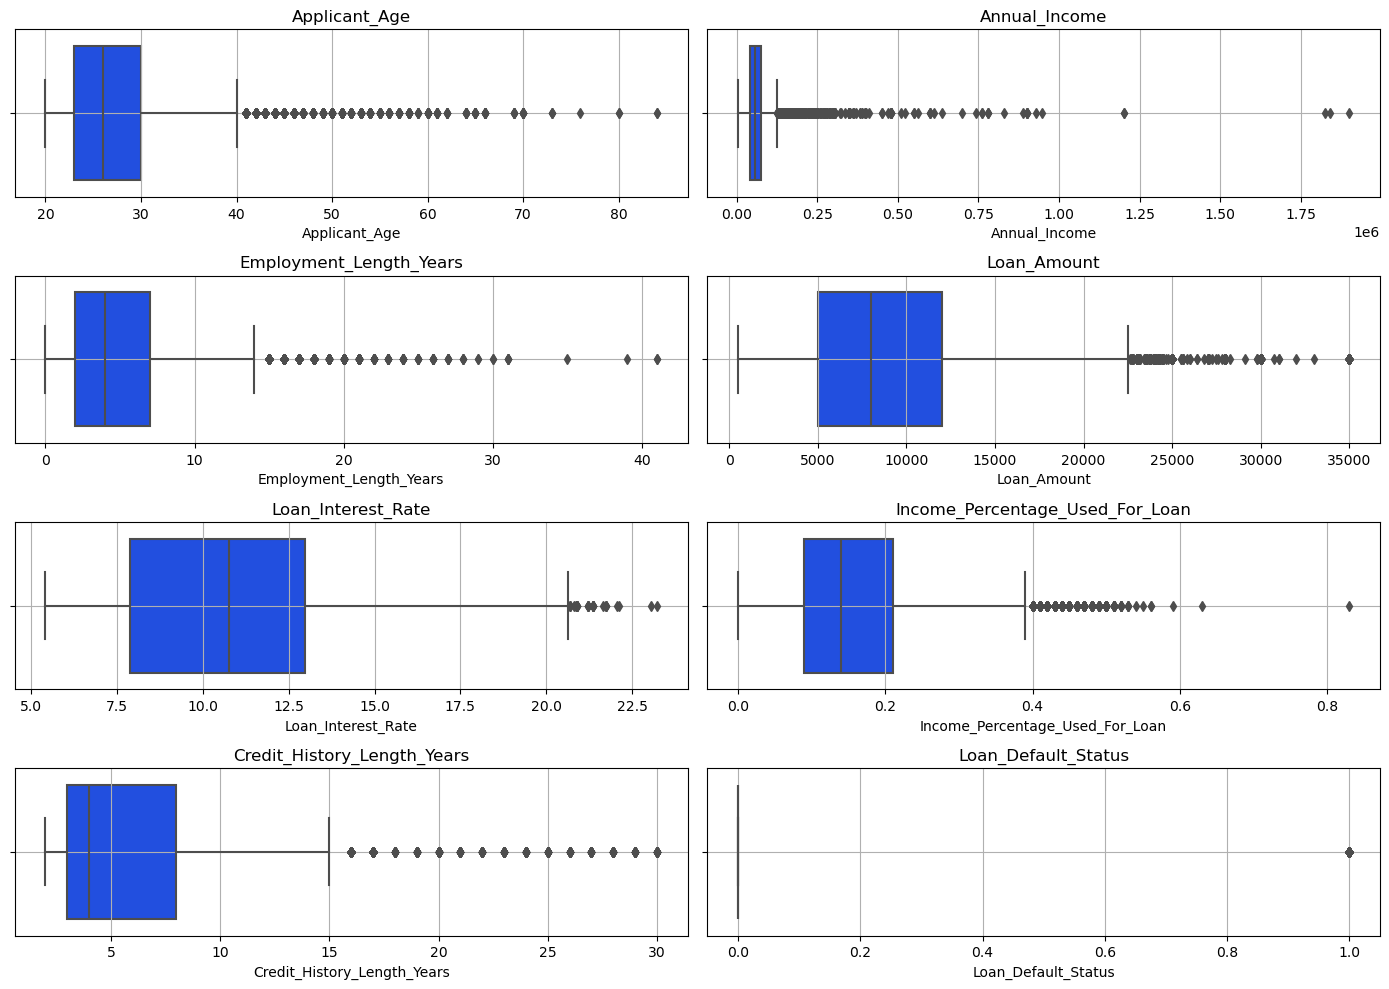

In [17]:
# Lets visualize for potential outliers
plt.figure(figsize=(14,10))
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.boxplot(x= df[i],palette='bright')
    plt.title(i)
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

                                 Applicant_Age  Annual_Income  \
Applicant_Age                         1.000000       0.102668   
Annual_Income                         0.102668       1.000000   
Employment_Length_Years               0.123795       0.164927   
Loan_Amount                           0.050647       0.310893   
Loan_Interest_Rate                    0.009670      -0.057631   
Income_Percentage_Used_For_Loan      -0.032121      -0.280311   
Credit_History_Length_Years           0.876253       0.082785   
Loan_Default_Status                  -0.001033      -0.169960   

                                 Employment_Length_Years  Loan_Amount  \
Applicant_Age                                   0.123795     0.050647   
Annual_Income                                   0.164927     0.310893   
Employment_Length_Years                         1.000000     0.091024   
Loan_Amount                                     0.091024     1.000000   
Loan_Interest_Rate                             -0

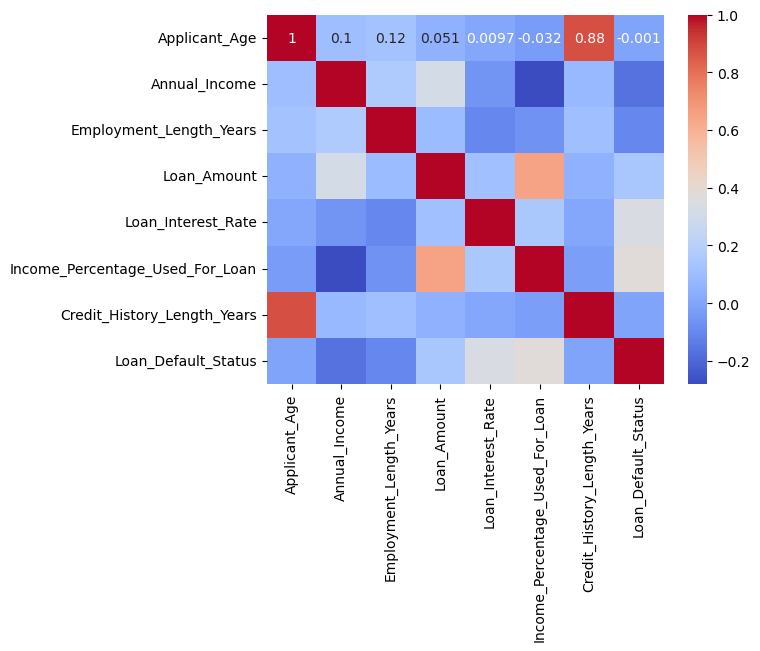

In [18]:
print(df[num].corr())
sns.heatmap(df[num].corr(),annot=True,cmap= 'coolwarm')
plt.show()

### UNIVARIATE ANALYSIS ON CATEGORICAL COLUMNS

In [19]:
df[cat].describe().T

,count,unique,top,freq
Home_Ownership_Status,58642,4,RENT,30594
Loan_Purpose,58642,6,EDUCATION,12271
Credit_Grade,58642,7,A,20984
Default_Flag_Credit_Bureau,58642,2,N,49941


In [20]:
# This explains us the most of the loan requests are from students with no previous defaults,with high credit grade

In [21]:
# lets check for any invalid entries on categorical columns
for i in cat:
    print(f"The unique values in column {i}:")
    print(df[i].unique())
    print('-'*120)

The unique values in column Home_Ownership_Status:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
------------------------------------------------------------------------------------------------------------------------
The unique values in column Loan_Purpose:
['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
------------------------------------------------------------------------------------------------------------------------
The unique values in column Credit_Grade:
['B' 'C' 'A' 'D' 'E' 'F' 'G']
------------------------------------------------------------------------------------------------------------------------
The unique values in column Default_Flag_Credit_Bureau:
['N' 'Y']
------------------------------------------------------------------------------------------------------------------------


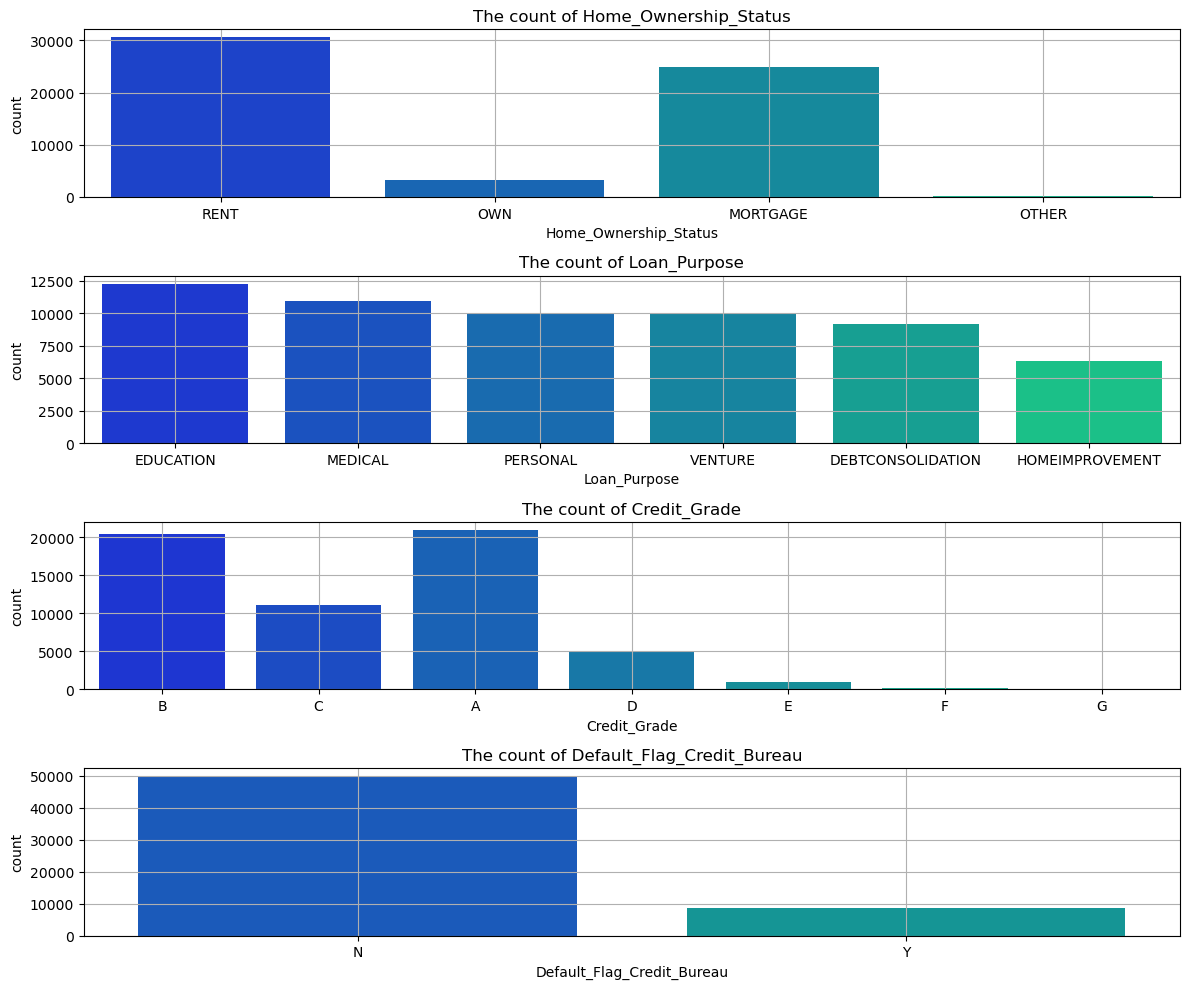

In [22]:
plt.rcParams['figure.figsize']= 12,10
t=1
for i in cat:
    plt.subplot(4,1,t)
    sns.countplot(x= df[i],palette='winter')
    plt.title(f"The count of {i}")
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

In [23]:
# people with renting home looks to be requesting for loan, could be possible because to own a house in future maybe
# Education being the highest for requesting loan could be because of the student college/school debt
# There are many people in our data to be maintaing a very good credit grade while most dont
# There are few who are flagged probably due to being a defaulter

#### BIVARIATE ANALYSIS, LETS SEE HOW THE OTHER FEATURES RELATE WITH OUR TARGET VARIABLE (lOAN STATUS)

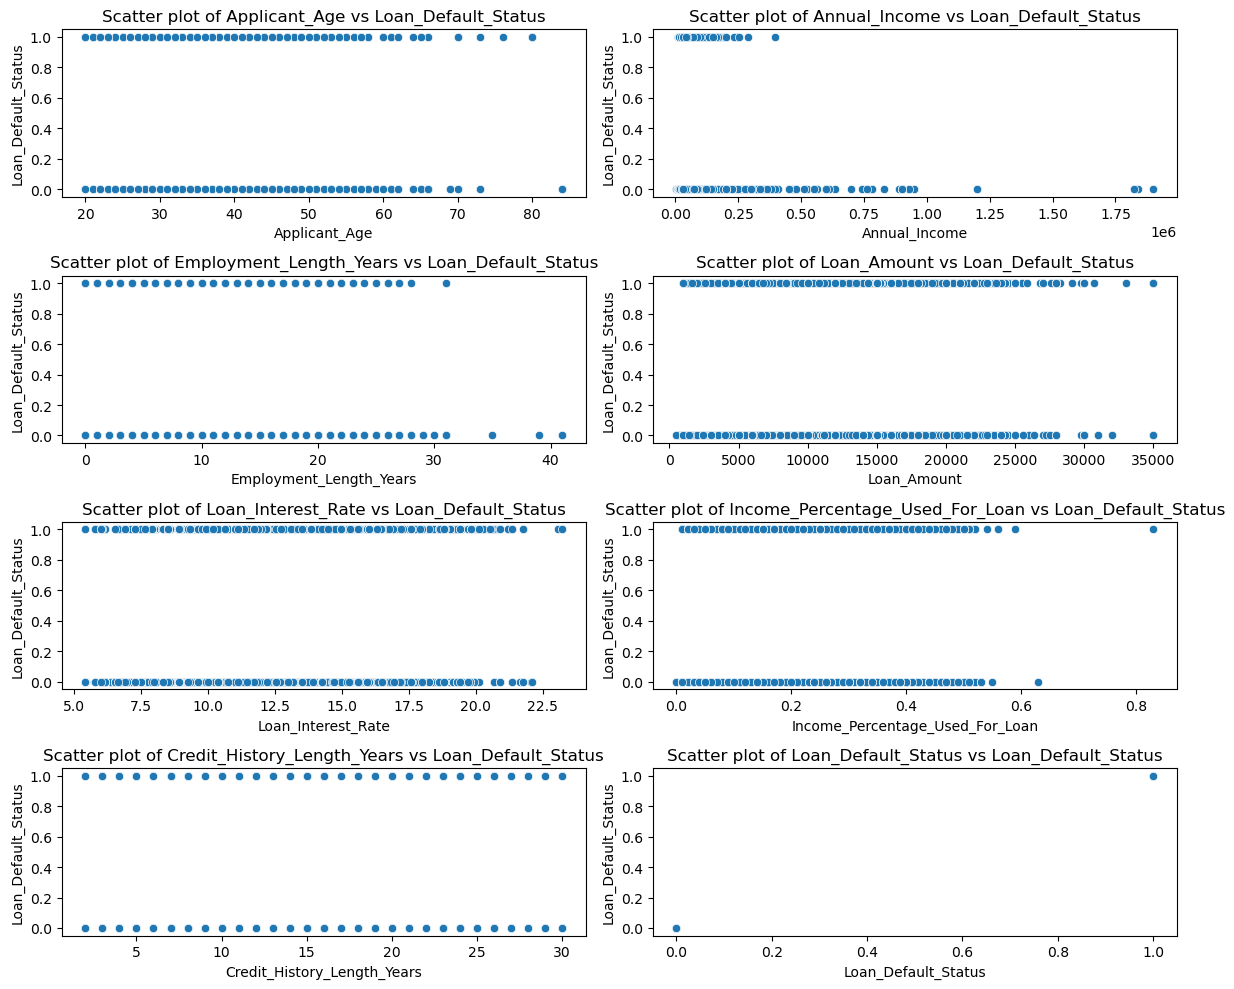

In [24]:
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.scatterplot(x=df[i],y=df['Loan_Default_Status'])
    plt.title(f'Scatter plot of {i} vs Loan_Default_Status')
    t+=1
plt.tight_layout()
plt.show()

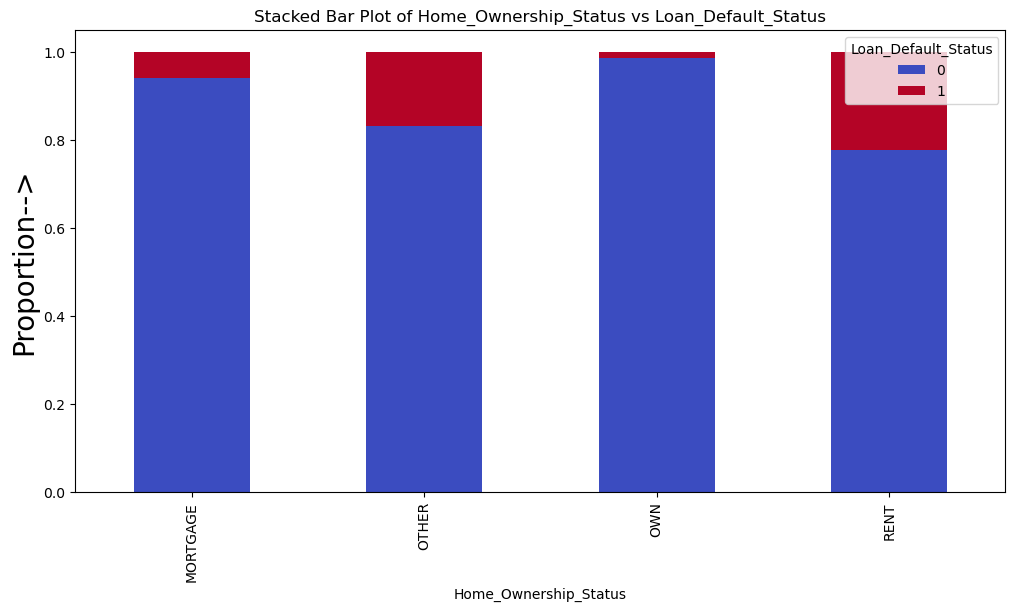

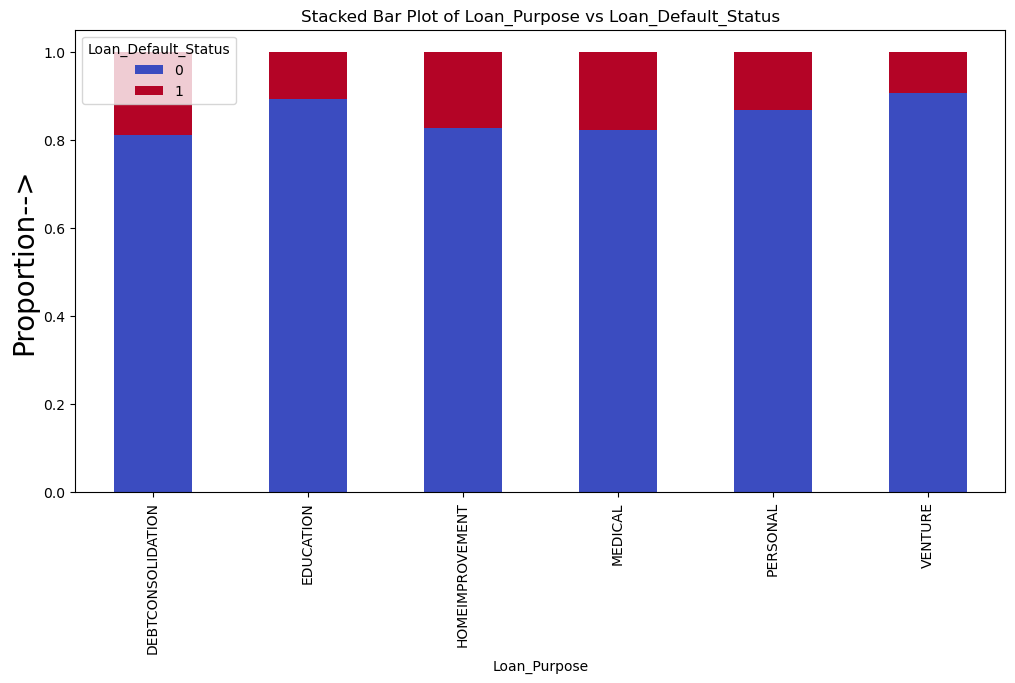

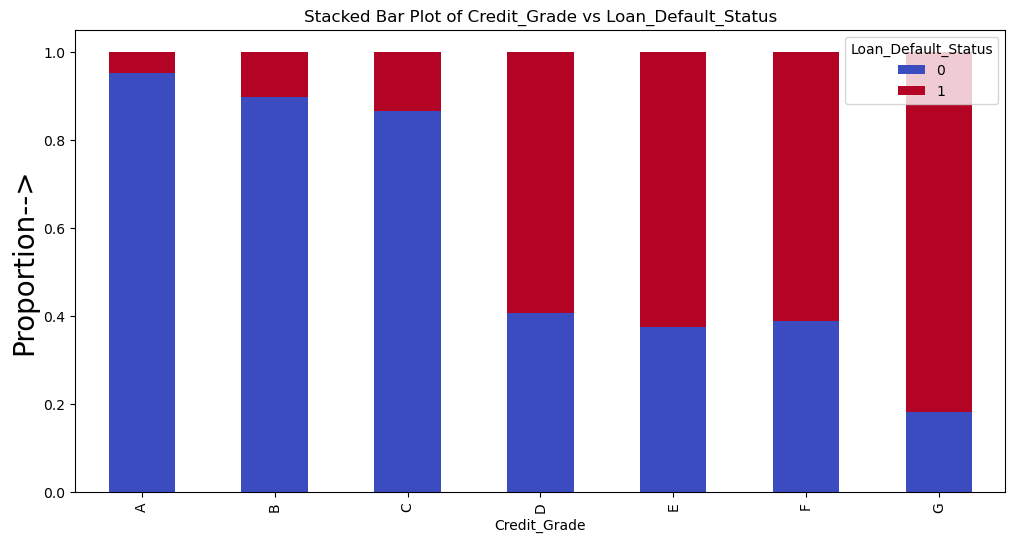

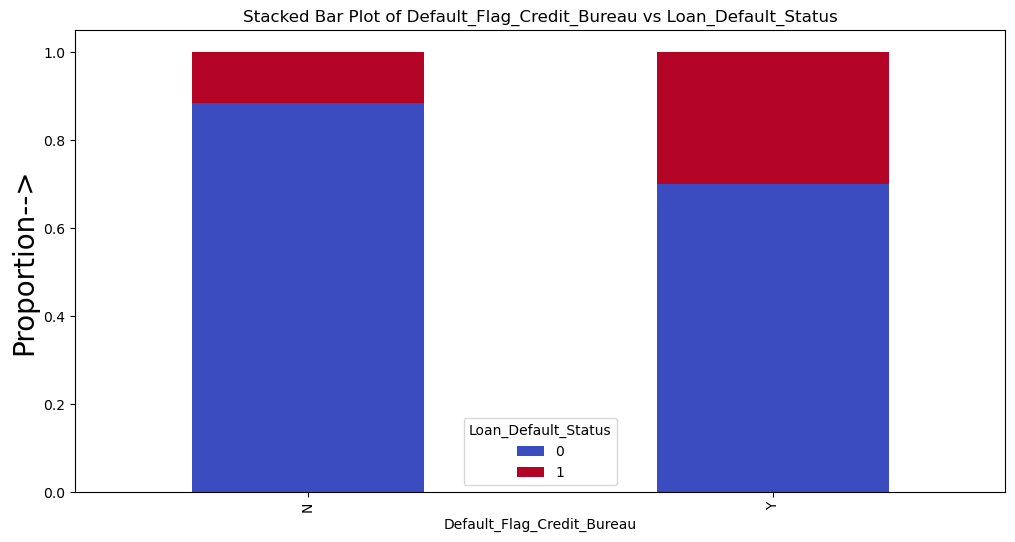

In [25]:
for i in cat:
    crosstab = pd.crosstab(df[i],df['Loan_Default_Status'],normalize='index')
    crosstab.plot(kind = 'bar',stacked = True,figsize = (12,6),cmap = 'coolwarm')
    plt.title(f'Stacked Bar Plot of {i} vs Loan_Default_Status')
    plt.ylabel('Proportion-->',fontsize = 20)
    plt.show()

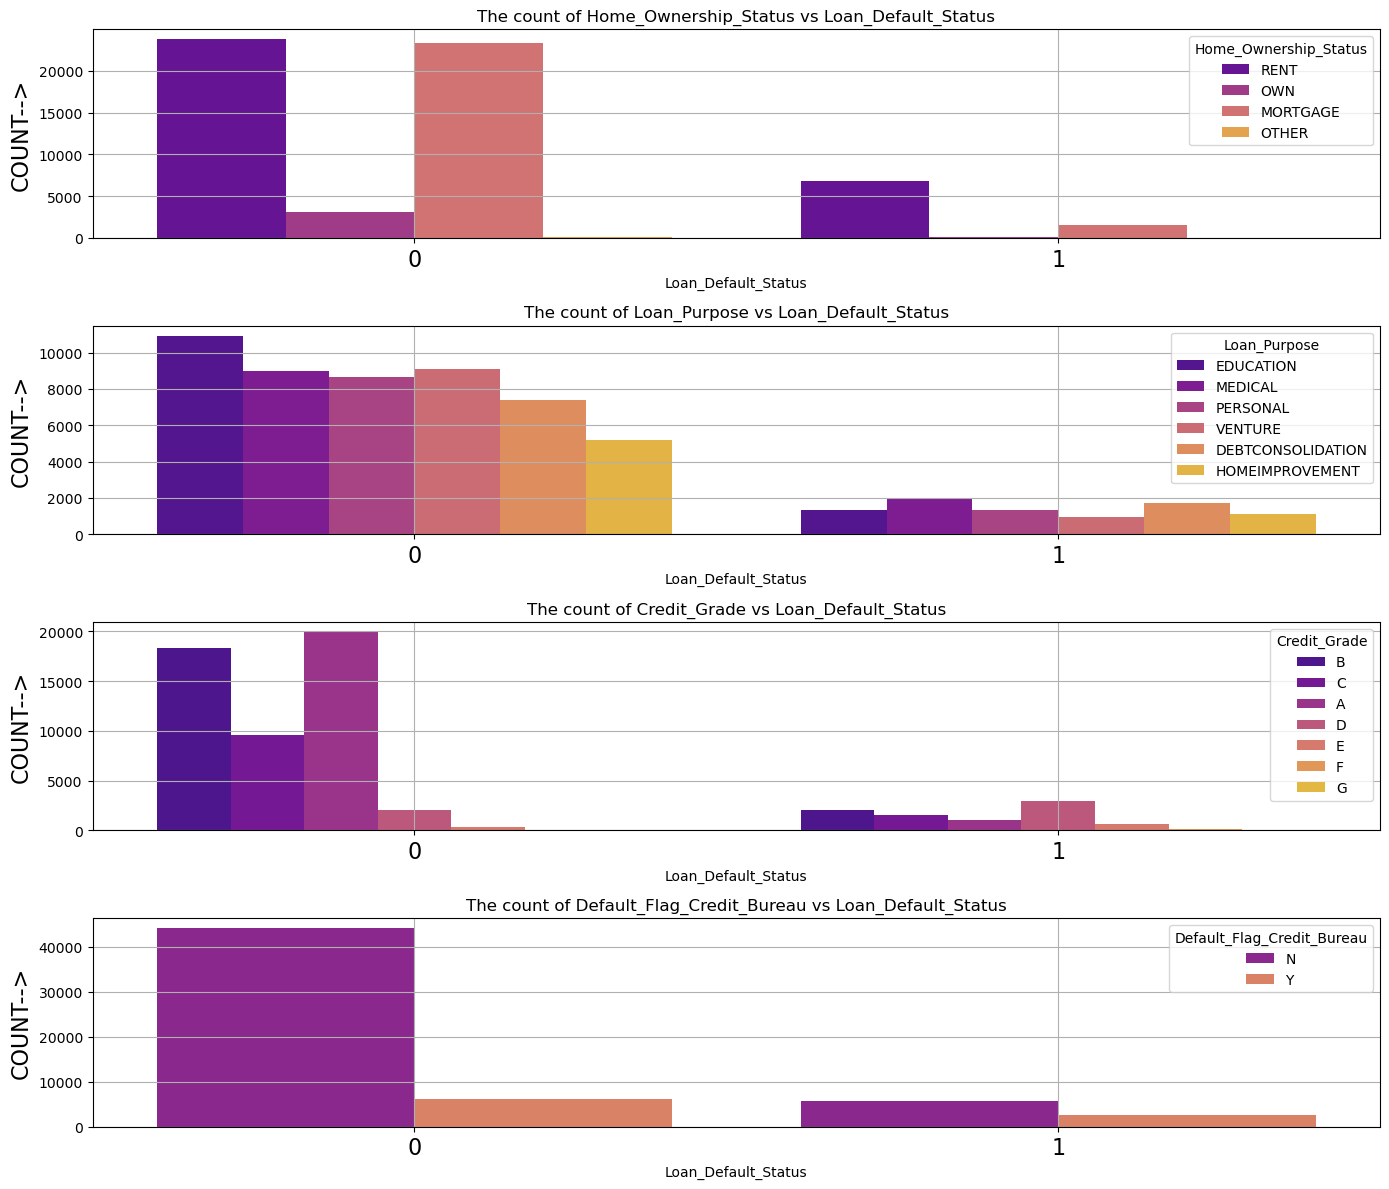

In [26]:
plt.figure(figsize=(14,12))
t=1
for i in cat:
    plt.subplot(4,1,t)
    sns.countplot(hue= df[i],x = df['Loan_Default_Status'],palette='plasma')
    plt.title(f"The count of {i} vs Loan_Default_Status")
    plt.ylabel('COUNT-->',fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

### GROUP BY ANALYSIS 

                   Loan_Interest_Rate
Loan_Purpose                         
DEBTCONSOLIDATION           10.613230
EDUCATION                   10.681510
HOMEIMPROVEMENT             10.881809
MEDICAL                     10.742353
PERSONAL                    10.607060
VENTURE                     10.604266


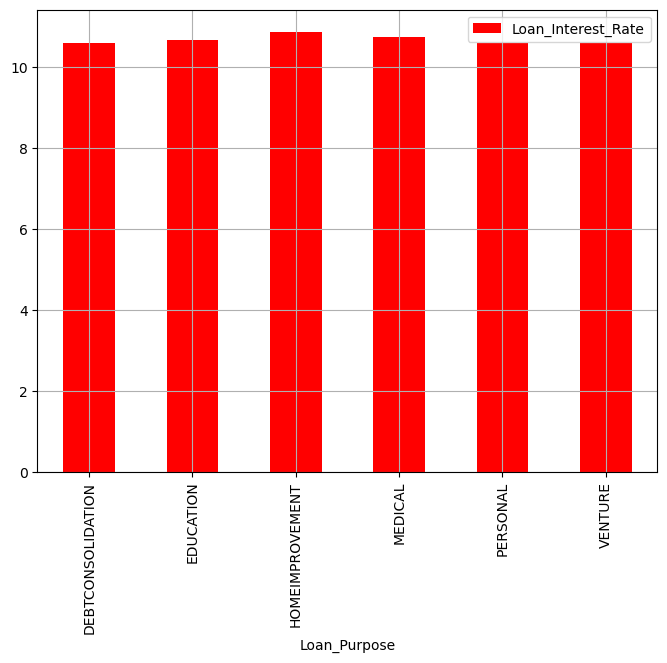

In [27]:
interest_rate_by_purpose = pd.DataFrame(df.groupby('Loan_Purpose')['Loan_Interest_Rate'].mean())
print(interest_rate_by_purpose)
interest_rate_by_purpose.plot(kind = 'bar',color = 'red',figsize =(8,6))
plt.grid()
plt.show()

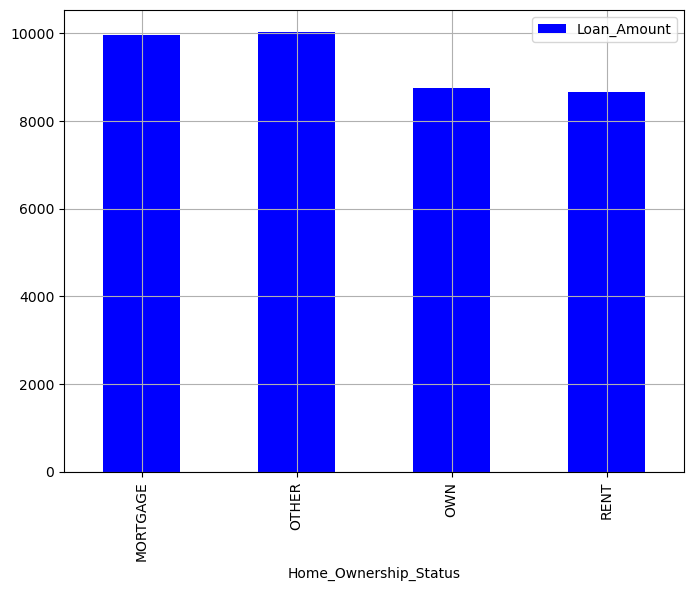

In [28]:
home_ownership_analysis = pd.DataFrame(df.groupby('Home_Ownership_Status')['Loan_Amount'].mean())
home_ownership_analysis.plot(kind = 'bar',color = 'b',figsize =(8,6))
plt.grid()
plt.show()

### Lets try to analyze the differances between a defaulter and non defaulter

Loan_Default_Status
0    50293
1     8349
Name: count, dtype: int64


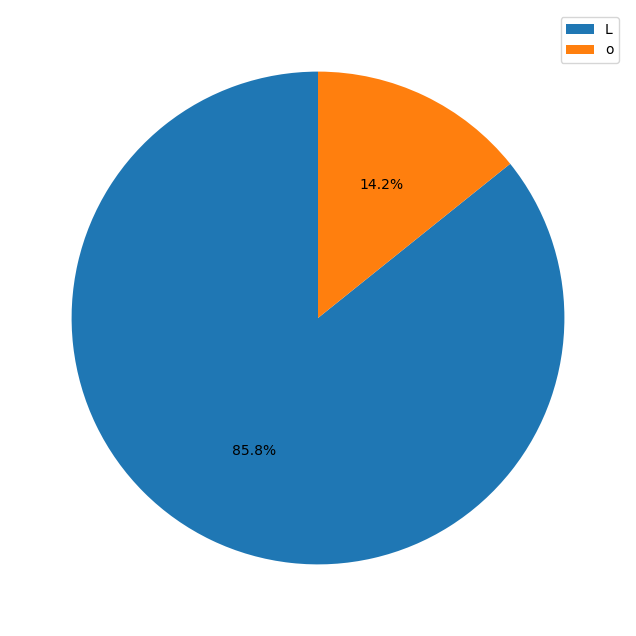

In [29]:
# Lets begin with visualizing our target variable
print(df.Loan_Default_Status.value_counts())
plt.figure(figsize=(8,8))
plt.pie(df['Loan_Default_Status'].value_counts(),autopct='%1.1f%%',startangle= 90)
plt.legend('Loan_Default_Status')
plt.show()

In [30]:
# Our target variable looks severly imbalanced with 70% differance 
# with majority of people are non defaulters 
# lets try to find why the 15 % are defaulters

                      Loan_Amount
Loan_Default_Status              
0                     8888.705824
1                    11195.618637


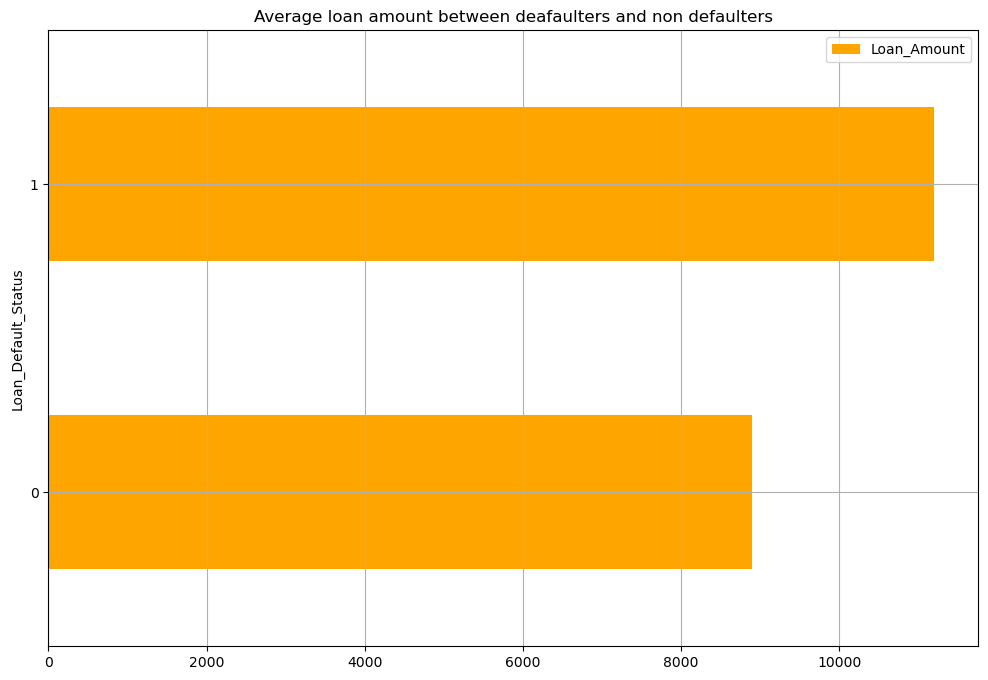

In [31]:
# lets find average loan amount between deafaulters and non defaulters
average_amount_loan_status =pd.DataFrame(df.groupby('Loan_Default_Status')['Loan_Amount'].mean())
print(average_amount_loan_status)
average_amount_loan_status.plot(kind= 'barh',color = 'orange',figsize = (12,8))
plt.grid()
plt.title("Average loan amount between deafaulters and non defaulters")
plt.show()

In [32]:
# The average loan amount is noticibly higer for defaulters compared to non defaulter
# which suggests us that why people were probably not able to pay on time

Loan_Default_Status
0    66670.985664
1    48223.209486
Name: Annual_Income, dtype: float64


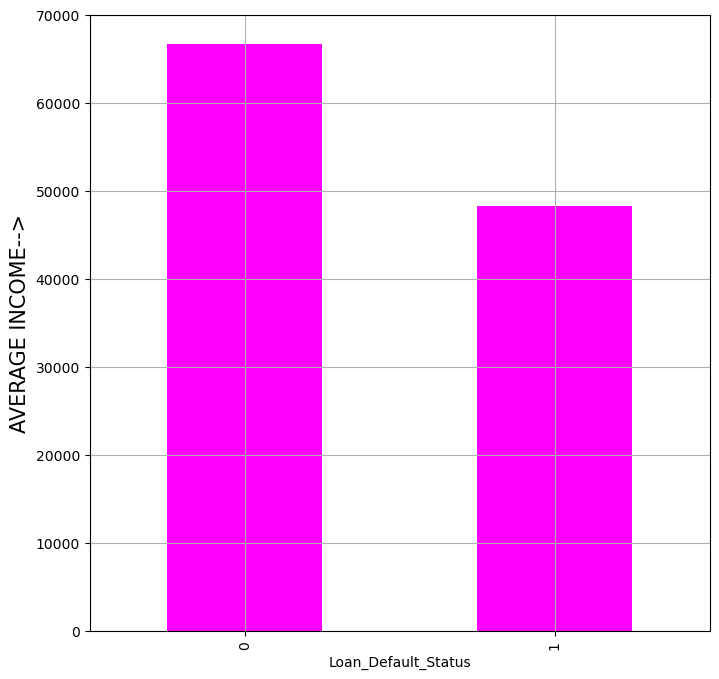

In [33]:
# Lets try to visualize the average annual income with loan_default_status
annual_income_status = df.groupby('Loan_Default_Status')['Annual_Income'].mean()
print(annual_income_status)
annual_income_status.plot(kind = 'bar',color = 'magenta',figsize=(8,8))
plt.ylabel("AVERAGE INCOME-->",fontsize = 15)
plt.grid()
plt.show()

In [34]:
#People who have defaulted have significantly lower income compared to the non defaulters
# suggesting that borrowers with lower incomes are at a higher risk of defaulting.

In [35]:
#lets check further if longer years of employment affects in being a defaulter
duration_of_employment= pd.DataFrame(df.groupby('Loan_Default_Status')['Employment_Length_Years'].mean())
duration_of_employment

,Employment_Length_Years
Loan_Default_Status,
0,4.860657
1,3.710744


                     Employment_Length_Years
Loan_Default_Status                         
0                                   4.860657
1                                   3.710744


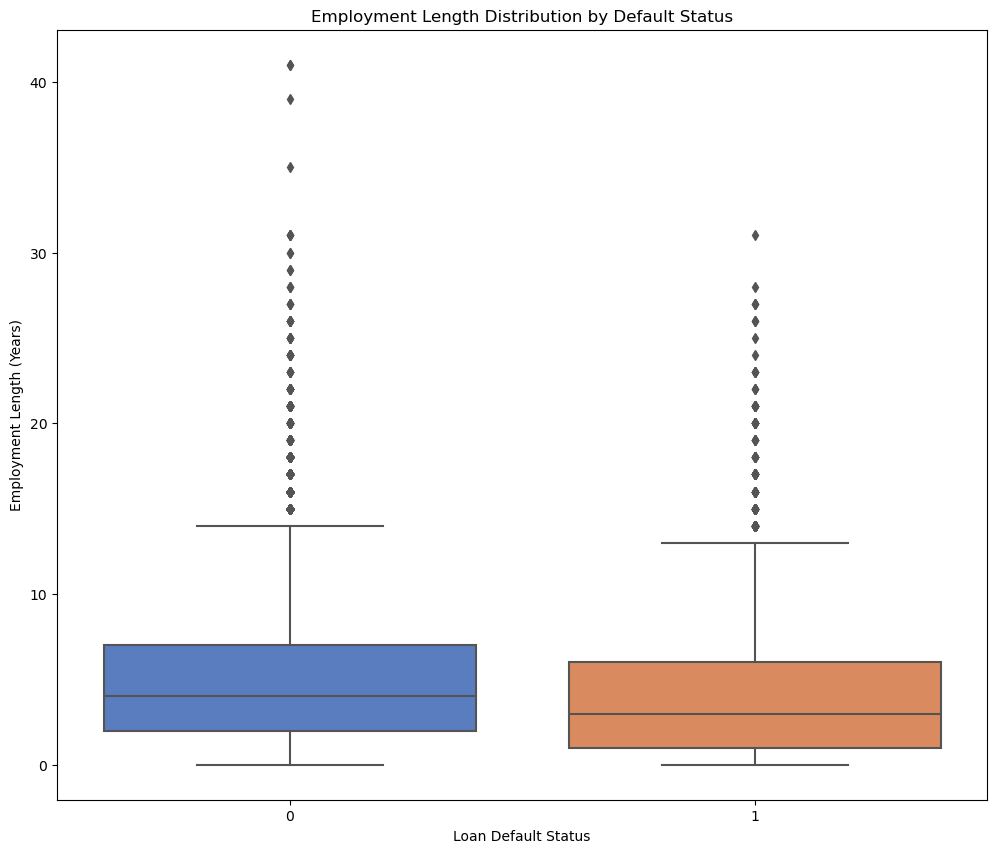

In [36]:
print(duration_of_employment)
sns.boxplot(x='Loan_Default_Status', y='Employment_Length_Years', data=df, palette='muted')
plt.title('Employment Length Distribution by Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('Employment Length (Years)')
plt.show()

In [37]:
# Shorter employment duration are increasingly high at risk on being a defaulter
# where as longer and stable employment are low at risk

# These differences highlight potential reasons for loan rejection:  

#### - Higher Loan Amounts: Defaulters tend to borrow significantly more, likely contributing to repayment challenges.  
#### - Lower Incomes: Defaulted borrowers have notably lower incomes, indicating higher default risk for low-income groups.  
#### - Shorter Employment Duration: Borrowers with unstable or shorter employment are more prone to default, while longer, stable employment reduces this risk.  

### ENCODING CATEGORICAL COLUMNS TO NUMERICAL

In [38]:
for i in cat:
    print(df[i].value_counts())
    print('-'*50)

Home_Ownership_Status
RENT        30594
MORTGAGE    24821
OWN          3138
OTHER          89
Name: count, dtype: int64
--------------------------------------------------
Loan_Purpose
EDUCATION            12271
MEDICAL              10933
PERSONAL             10015
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
--------------------------------------------------
Credit_Grade
A    20984
B    20398
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64
--------------------------------------------------
Default_Flag_Credit_Bureau
N    49941
Y     8701
Name: count, dtype: int64
--------------------------------------------------


In [39]:
# We will use ordinal encoder for column like credit_grade to manitain the hierarchy where
# A>B>C>D>E>F>G where A being the best score and G being the worst

In [40]:
# Before we move forward with the enocoding and alterations, Lets take a copy of our data
df2 = df.copy()

In [41]:
from sklearn.preprocessing import OrdinalEncoder
grade_order = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
ordinal_encoder = OrdinalEncoder(categories=grade_order)
df['Credit_Grade'] = ordinal_encoder.fit_transform(df[['Credit_Grade']])

In [42]:
# Lets replace the values in Default_Flag_Credit_Bureau N-> 0 and Y-> 1
# 0-> No default and 1-> Default
df['Default_Flag_Credit_Bureau'] = df['Default_Flag_Credit_Bureau'].replace({'N':0,'Y':1})

In [43]:
# Lets label encode the column loan purpose where there is no hierarchy 
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['Loan_Purpose'] = LabelEncoder.fit_transform(df['Loan_Purpose'])

In [44]:
# Lets use frequency encoding on the column Home_Ownership_Status,It simply replaces the values with the occurance of count
# and its easier to implement and computationaly efficient
a = df['Home_Ownership_Status'].value_counts(normalize=True)*100
df['Home_Ownership_Status'] = df['Home_Ownership_Status'].map(a)

#### NOW THAT WE HAVE ENOCODED ALL THE CATEGORICAL COLUMNS TO NUMERICAL,LETS PROCEED WITH MODEL BUILDING

## MODEL BUILDING USING IMBALANCED DATASET

In [67]:
# Lets importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,f1_score,precision_score,recall_score,cohen_kappa_score

In [46]:
x= df.drop( columns= 'Loan_Default_Status',axis= 1)
y= df['Loan_Default_Status']

In [47]:
# Stratified sampling to maintain the ratio of population 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [48]:
print('x train',xtrain.shape)
print('x test',xtest.shape)
print('y train',ytrain.shape)
print('y test',ytest.shape)

x train (41049, 11)
x test (17593, 11)
y train (41049,)
y test (17593,)


In [49]:
xtrain_sc = xtrain.copy()
xtest_sc = xtest.copy()

In [50]:
num = ['Applicant_Age',
 'Annual_Income',
 'Employment_Length_Years',
 'Loan_Amount',
 'Loan_Interest_Rate',
 'Income_Percentage_Used_For_Loan',
 'Credit_History_Length_Years']

In [51]:
# Lets scale the data to one common scale
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
xtrain_sc[num] = StandardScaler.fit_transform(xtrain[num])
xtest_sc[num] = StandardScaler.transform(xtest[num])

In [53]:
# User define function for the metrics
def metrics(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', f1_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg))
    print('Cohen Kappa Score :', cohen_kappa_score(key,arg))

In [74]:
# User defined function for ROC - AUC curve
def curve(key,arg):
    plt.figure(figsize=(6,4))
    fpr,tpr,threshold = roc_curve(key,arg)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0 ,1.0])
    plt.ylim([0.0 , 1.0])
    print('Area under the curve:',roc_auc_score(key,arg))

## LOGISTIC REGRESSION

In [58]:
lr = LogisticRegression()
lr.fit(xtrain_sc,ytrain)
lr_pred = lr.predict(xtest_sc)
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
a1 = round(accuracy_score(ytest,lr_pred)*100,3)
a1

90.144

In [62]:
f1 = round(f1_score(ytest,lr_pred,average='weighted')*100,3)
f1

89.081

In [68]:
metrics('Logistic Regression',ytest,lr_pred)

Name of the model : Logistic Regression
Precision score : 0.7551290536068829
Recall score : 0.4554890219560878
Accuracy : 0.9014380719604388
F1-Score : 0.5682270916334661
Weighted F1-Score 0.8908120945961459
Classification report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.94     15088
           1       0.76      0.46      0.57      2505

    accuracy                           0.90     17593
   macro avg       0.84      0.72      0.76     17593
weighted avg       0.89      0.90      0.89     17593

Cohen Kappa Score : 0.5164136264231126


Area under the curve: 0.715483111190133


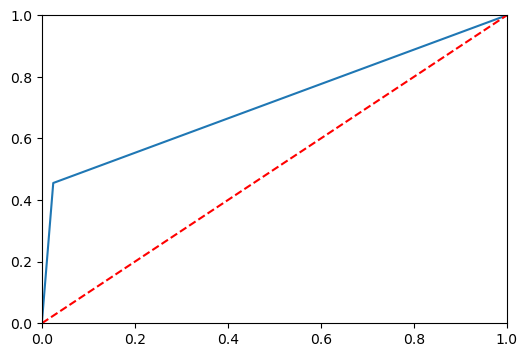

In [75]:
curve(ytest,lr_pred)

## DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain_sc,ytrain)
dt_pred = dt.predict(xtest_sc)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
a2 = round(accuracy_score(ytest,dt_pred)*100,3)
a2

90.877

In [78]:
f2 = round(f1_score(ytest,dt_pred,average='weighted')*100,3)
f2

90.988

In [79]:
metrics('Decision Tree Classifier',ytest,dt_pred)

Name of the model : Decision Tree Classifier
Precision score : 0.6694277108433735
Recall score : 0.7097804391217565
Accuracy : 0.9087705337350083
F1-Score : 0.6890137570238327
Weighted F1-Score 0.9098757218543551
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     15088
           1       0.67      0.71      0.69      2505

    accuracy                           0.91     17593
   macro avg       0.81      0.83      0.82     17593
weighted avg       0.91      0.91      0.91     17593

Cohen Kappa Score : 0.635611920071196


Area under the curve: 0.8257942492533492


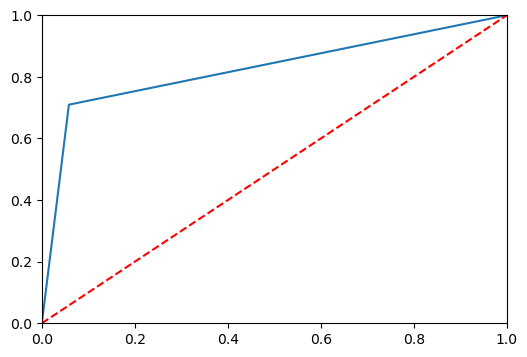

In [80]:
curve(ytest,dt_pred)

## RandomForestClassifier

In [81]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain_sc,ytrain)
rf_pred = rf.predict(xtest_sc)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
a3 = round(accuracy_score(ytest,rf_pred)*100,3)
a3

94.93

In [83]:
f3 = round(f1_score(ytest,rf_pred,average='weighted')*100,3)
f3

94.623

In [84]:
metrics('RandomForestClassifier',ytest,rf_pred)

Name of the model : RandomForestClassifier
Precision score : 0.9278514588859417
Recall score : 0.6982035928143713
Accuracy : 0.9492980162564656
F1-Score : 0.7968109339407745
Weighted F1-Score 0.9462280723989606
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     15088
           1       0.93      0.70      0.80      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.84      0.88     17593
weighted avg       0.95      0.95      0.95     17593

Cohen Kappa Score : 0.7685043477285983


Area under the curve: 0.8445949035121696


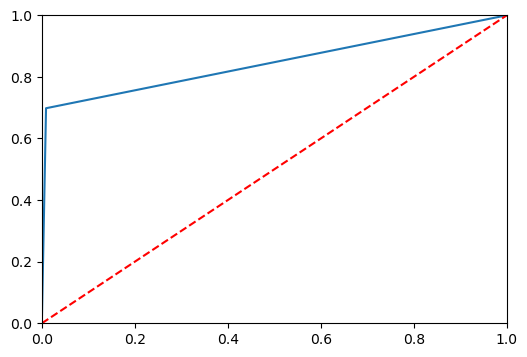

In [85]:
curve(ytest,rf_pred)

## Naive - Bayes Classifier

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain_sc,ytrain)
nb_pred = nb.predict(xtest_sc)
nb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
a4 = round(accuracy_score(ytest,nb_pred)*100,3)
a4

84.966

In [91]:
f4 = round(f1_score(ytest,nb_pred,average='weighted')*100,3)
f4

86.144

In [88]:
metrics('Naive Bayes classifier- GaussianNB',ytest,nb_pred)

Name of the model : Naive Bayes classifier- GaussianNB
Precision score : 0.48137307078233105
Recall score : 0.7221556886227545
Accuracy : 0.8496561132268516
F1-Score : 0.5776784288679547
Weighted F1-Score 0.8614387097245073
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     15088
           1       0.48      0.72      0.58      2505

    accuracy                           0.85     17593
   macro avg       0.72      0.80      0.74     17593
weighted avg       0.88      0.85      0.86     17593

Cohen Kappa Score : 0.49064338853241396


Area under the curve: 0.7964900924555978


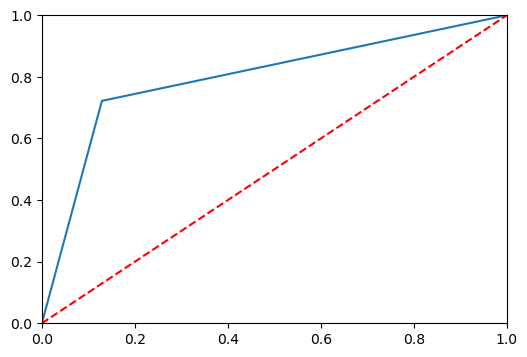

In [89]:
curve(ytest,nb_pred)

## GradientBoostingClassifier

In [92]:
gb = GradientBoostingClassifier(random_state=100)
gb.fit(xtrain_sc,ytrain)
gb_pred = gb.predict(xtest_sc)
gb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
a5 = round(accuracy_score(ytest,gb_pred)*100,3)
a5

94.771

In [94]:
f5 = round(f1_score(ytest,gb_pred,average='weighted')*100,3)
f5

94.487

In [95]:
metrics('GradientBoostingClassifier',ytest,gb_pred)

Name of the model : GradientBoostingClassifier
Precision score : 0.9082946934569809
Recall score : 0.7037924151696606
Accuracy : 0.9477064741658614
F1-Score : 0.793072424651372
Weighted F1-Score 0.944869336757723
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     15088
           1       0.91      0.70      0.79      2505

    accuracy                           0.95     17593
   macro avg       0.93      0.85      0.88     17593
weighted avg       0.95      0.95      0.94     17593

Cohen Kappa Score : 0.7636939887991467


Area under the curve: 0.8459974801192948


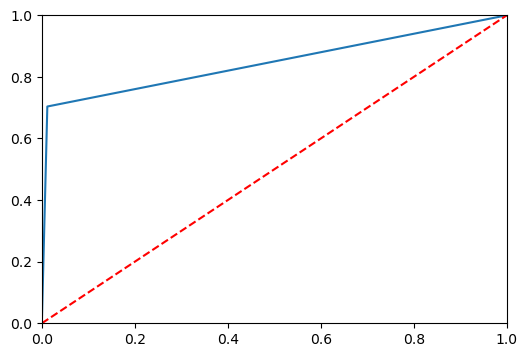

In [96]:
curve(ytest,gb_pred)

## AdaBoostClassifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=100)
ada.fit(xtrain_sc,ytrain)
ada_pred = ada.predict(xtest_sc)
ada_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
a6 = round(accuracy_score(ytest,ada_pred)*100,3)
a6

92.935

In [101]:
f6 = round(f1_score(ytest,ada_pred,average='weighted')*100,3)
f6

92.604

In [102]:
metrics('AdaBoostClassifier',ytest,ada_pred)

Name of the model : AdaBoostClassifier
Precision score : 0.8139303482587065
Recall score : 0.6530938123752495
Accuracy : 0.9293468993349627
F1-Score : 0.7246954595791805
Weighted F1-Score 0.926044024871166
Classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15088
           1       0.81      0.65      0.72      2505

    accuracy                           0.93     17593
   macro avg       0.88      0.81      0.84     17593
weighted avg       0.93      0.93      0.93     17593

Cohen Kappa Score : 0.6847264208890436


Area under the curve: 0.814152950726331


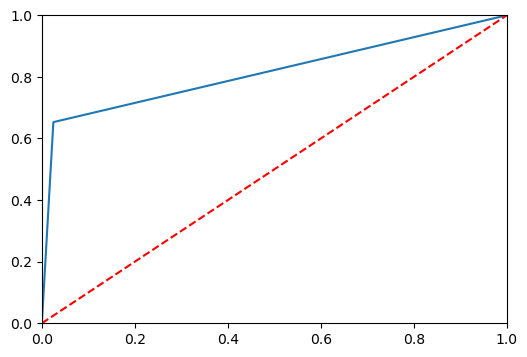

In [103]:
curve(ytest,ada_pred)

## XGBClassifier

In [104]:
xg = XGBClassifier(random_state=100)
xg.fit(xtrain_sc,ytrain)
xg_pred = xg.predict(xtest_sc)
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
a7 = round(accuracy_score(ytest,xg_pred)*100,3)
a7

95.203

In [106]:
f7 = round(f1_score(ytest,xg_pred,average='weighted')*100,3)
f7

94.997

In [107]:
metrics('XGBClassifier',ytest,xg_pred)

Name of the model : XGBClassifier
Precision score : 0.9057156814851002
Recall score : 0.7401197604790419
Accuracy : 0.9520263741260728
F1-Score : 0.8145869947275922
Weighted F1-Score 0.9499715580470592
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.91      0.74      0.81      2505

    accuracy                           0.95     17593
   macro avg       0.93      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593

Cohen Kappa Score : 0.7873557814297232


Area under the curve: 0.8636640689987999


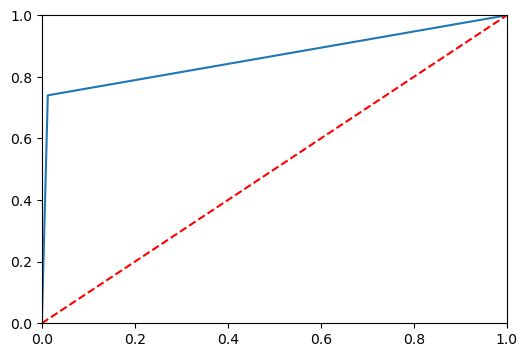

In [108]:
curve(ytest,xg_pred)

##### We were able to achieve a highest score 95% using Xgboos lets try again by using fine tuning to check if our model performs better

## TUNED MODELS

#### Lets perform fine tuning using RandomSearchCV for the best performing models such as :
#### Random Forest Classifier
#### Gradient Boost
#### Ada Boost
#### Xgboost

## TUNED Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions = param_grid,cv= 5 ,random_state=42)

random_search.fit(xtrain_sc,ytrain)

In [118]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [119]:
best_params

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [ ]:
best_model

In [144]:
rf_tunned = RandomForestClassifier(n_estimators = 150 ,max_depth=10, min_samples_leaf=2, min_samples_split=10,random_state=100)
rf_tunned.fit(xtrain_sc,ytrain)
rf_tunned_pred = rf.predict(xtest_sc)
rf_tunned_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
a8 = round(accuracy_score(ytest,rf_tunned_pred)*100,3)
a8

94.93

In [146]:
f8 = round(f1_score(ytest,rf_tunned_pred,average='weighted')*100,3)
f8

94.623

In [127]:
metrics('Tunned Random Forest classifier',ytest,rf_tunned_pred)

Name of the model : Tunned Random Forest classifier
Precision score : 0.9278514588859417
Recall score : 0.6982035928143713
Accuracy : 0.9492980162564656
F1-Score : 0.7968109339407745
Weighted F1-Score 0.9462280723989606
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     15088
           1       0.93      0.70      0.80      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.84      0.88     17593
weighted avg       0.95      0.95      0.95     17593

Cohen Kappa Score : 0.7685043477285983


Area under the curve: 0.8445949035121696


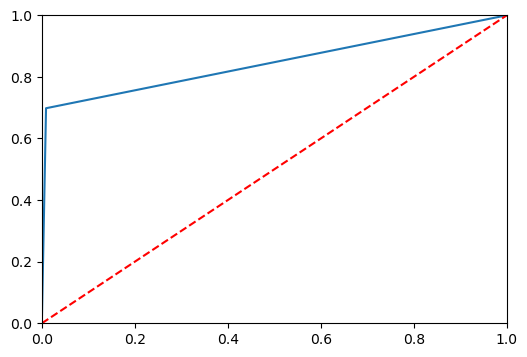

In [128]:
curve(ytest,rf_tunned_pred)

## TUNED Gradient Boost

In [131]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7] }

random_search = RandomizedSearchCV(estimator=gb, param_distributions = param_grid, cv=5, scoring='accuracy')

random_search.fit(xtrain_sc, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=100),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [132]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [133]:
best_params

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}

In [134]:
best_model

GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=100)

In [143]:
gb_tuned = GradientBoostingClassifier(n_estimators=150,learning_rate = 0.1, max_depth = 5, random_state=100)
gb_tuned.fit(xtrain_sc,ytrain)
gb_tuned_pred = gb_tuned.predict(xtest_sc)
gb_tuned_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
a9 = round(accuracy_score(ytest,gb_tuned_pred)*100,3)
a9

95.208

In [139]:
f9 = round(f1_score(ytest,gb_tuned_pred,average='weighted')*100,3)
f9

94.976

In [141]:
metrics('Tunned Gradient Boosting classifier',ytest,gb_tuned_pred)

Name of the model : Tunned Gradient Boosting classifier
Precision score : 0.9167502507522568
Recall score : 0.7297405189620758
Accuracy : 0.952083214915023
F1-Score : 0.812625027783952
Weighted F1-Score 0.9497609568375317
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.92      0.73      0.81      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593

Cohen Kappa Score : 0.7855596929406727


Area under the curve: 0.8593691990356508


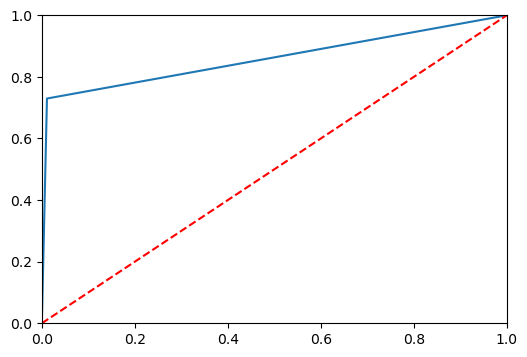

In [142]:
curve(ytest,gb_tuned_pred)

## TUNED ADA Boost

In [148]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.5, 1.0]}

random_search = RandomizedSearchCV(estimator=ada, param_distributions =param_grid, cv=5, scoring='accuracy')

random_search.fit(xtrain_sc, ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=100),
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0],
                                        'n_estimators': [100, 150]},
                   scoring='accuracy')

In [149]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [150]:
best_params

{'n_estimators': 150, 'learning_rate': 1.0}

In [151]:
best_model

AdaBoostClassifier(n_estimators=150, random_state=100)

In [153]:
ada_tuned = AdaBoostClassifier(learning_rate= 1.0, n_estimators=150, random_state=100)
ada_tuned.fit(xtrain,ytrain)
ada_tuned_pred = ada_tuned.predict(xtest_sc)
ada_tuned_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
a10 = round(accuracy_score(ytest,ada_tuned_pred)*100,3)
a10

82.47

In [155]:
f10 = round(f1_score(ytest,ada_tuned_pred,average='weighted')*100,3)
f10

83.219

In [157]:
metrics('Ada Boosting classifier with important features',ytest,ada_tuned_pred)

Name of the model : Ada Boosting classifier with important features
Precision score : 0.4064620355411955
Recall score : 0.5021956087824351
Accuracy : 0.8247030068777355
F1-Score : 0.4492857142857143
Weighted F1-Score 0.8321895276182645
Classification report 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     15088
           1       0.41      0.50      0.45      2505

    accuracy                           0.82     17593
   macro avg       0.66      0.69      0.67     17593
weighted avg       0.84      0.82      0.83     17593

Cohen Kappa Score : 0.3464204055057619


Area under the curve: 0.6902216113901571


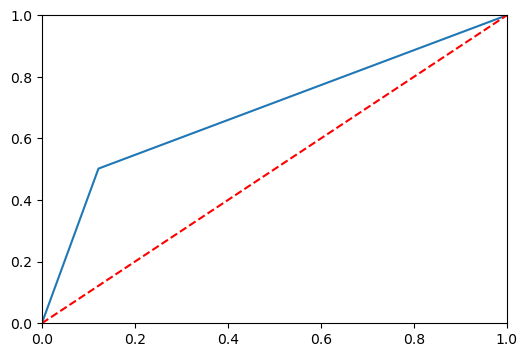

In [158]:
curve(ytest,ada_tuned_pred)

## TUNED XGBOOST

In [159]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
                        }

random_search = RandomizedSearchCV(estimator= xg, param_distributions = param_grid, cv=5, scoring='accuracy')

random_search.fit(xtrain_sc, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 150]},
                   scoring='accuracy')

In [160]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [161]:
best_params

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}

In [163]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [164]:
xg_tuned = XGBClassifier(learning_rate = 0.1,max_depth=5, n_estimators = 150,random_state=100)
xg_tuned.fit(xtrain_sc,ytrain)
xg_tuned_pred = xg_tuned.predict(xtest_sc)
xg_tuned_pred

array([0, 0, 0, ..., 0, 0, 0])

In [165]:
a11 = round(accuracy_score(ytest,xg_tuned_pred)*100,3)
a11

95.328

In [166]:
f11 = round(f1_score(ytest,xg_tuned_pred,average='weighted')*100,3)
f11

95.089

In [167]:
metrics('Tunned XG Boosting classifier',ytest,xg_tuned_pred)

Name of the model : Tunned XG Boosting classifier
Precision score : 0.9273743016759777
Recall score : 0.7289421157684631
Accuracy : 0.9532768714829761
F1-Score : 0.8162717925793475
Weighted F1-Score 0.9508857956073464
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     15088
           1       0.93      0.73      0.82      2505

    accuracy                           0.95     17593
   macro avg       0.94      0.86      0.89     17593
weighted avg       0.95      0.95      0.95     17593

Cohen Kappa Score : 0.7899462037168193


Area under the curve: 0.8597321925607957


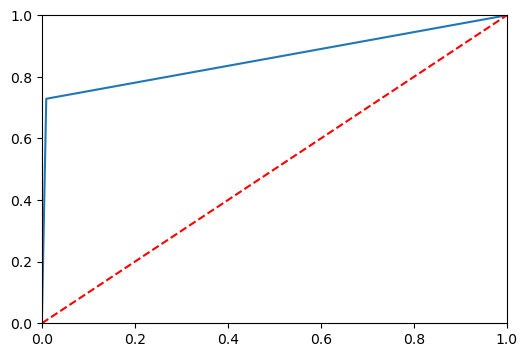

In [168]:
curve(ytest,xg_tuned_pred)

# SUMMARY

In [176]:
data = {'Models': ['Logistic Regression', 'Decision Tree Classifier',
                   'Random Forest Classifier', 'Naive Bayes Classifier',
                   'Gradient Boosting Classifier', 'Ada Boosting Classifier',
                   'XGBoost Classifier', 'Tuned Random Forest',
                   'Tuned Gradient Boosting Classifier', 'Tuned Ada Boosting Classifier',
                   'Tuned XGBoost Classifier'],
        'Accuracy': [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11],
        'Weighted F1_score': [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]}

model_comparison_df = pd.DataFrame(data).sort_values(by = ['Accuracy','Weighted F1_score'],ascending=False,ignore_index=True)

model_comparison_df

,Models,Accuracy,Weighted F1_score
0,Tuned XGBoost Classifier,95.328,95.089
1,Tuned Gradient Boosting Classifier,95.208,94.976
2,XGBoost Classifier,95.203,94.997
3,Random Forest Classifier,94.930,94.623
4,Tuned Random Forest,94.930,94.623
5,Gradient Boosting Classifier,94.771,94.487
6,Ada Boosting Classifier,92.935,92.604
7,Decision Tree Classifier,90.877,90.988
8,Logistic Regression,90.144,89.081
9,Naive Bayes Classifier,84.966,86.144


#### Tuning improved the performance of Gradient Boosting and XGBoost Classifiers, while Random Forest remained unchanged, and Ada Boosting saw a decline. Overall, tuning had a positive impact on Gradient Boosting and XGBoost.

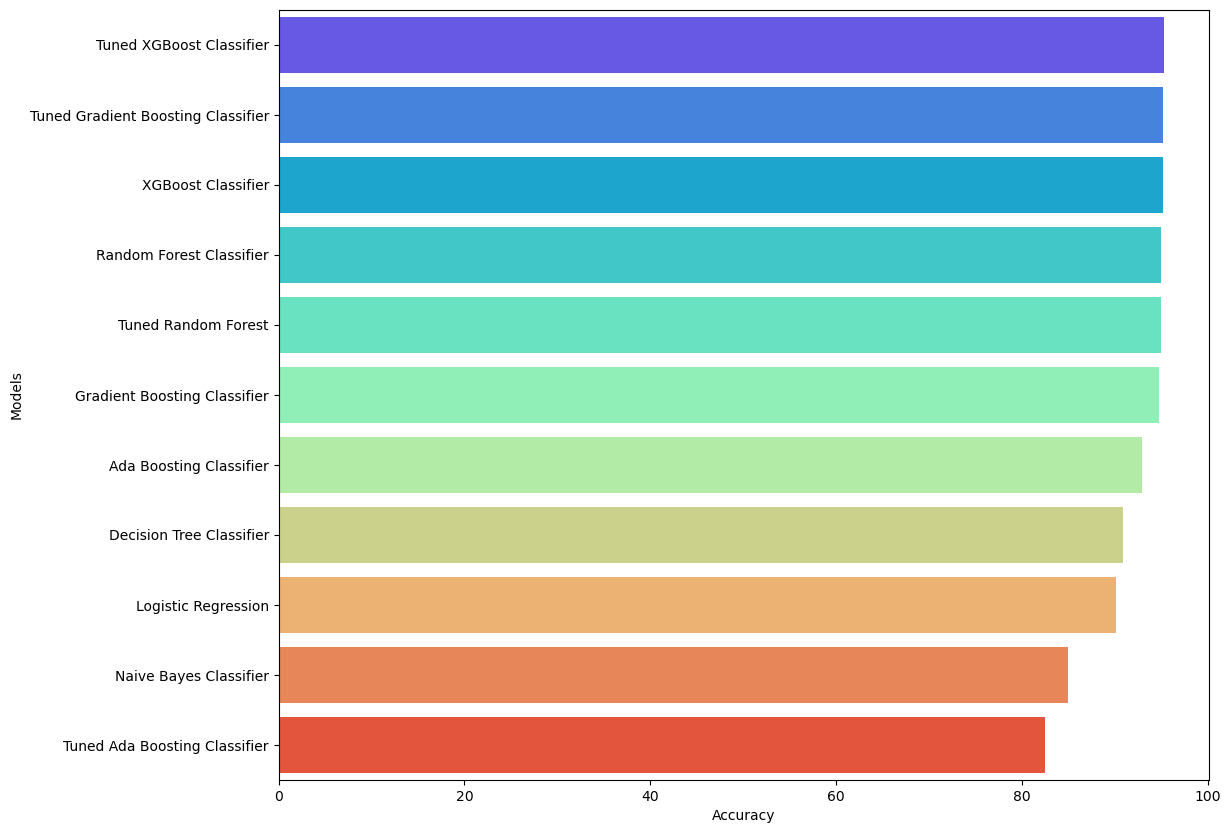

In [174]:
sns.barplot(x=model_comparison_df['Accuracy'],y=model_comparison_df['Models'],palette='rainbow')
plt.show()

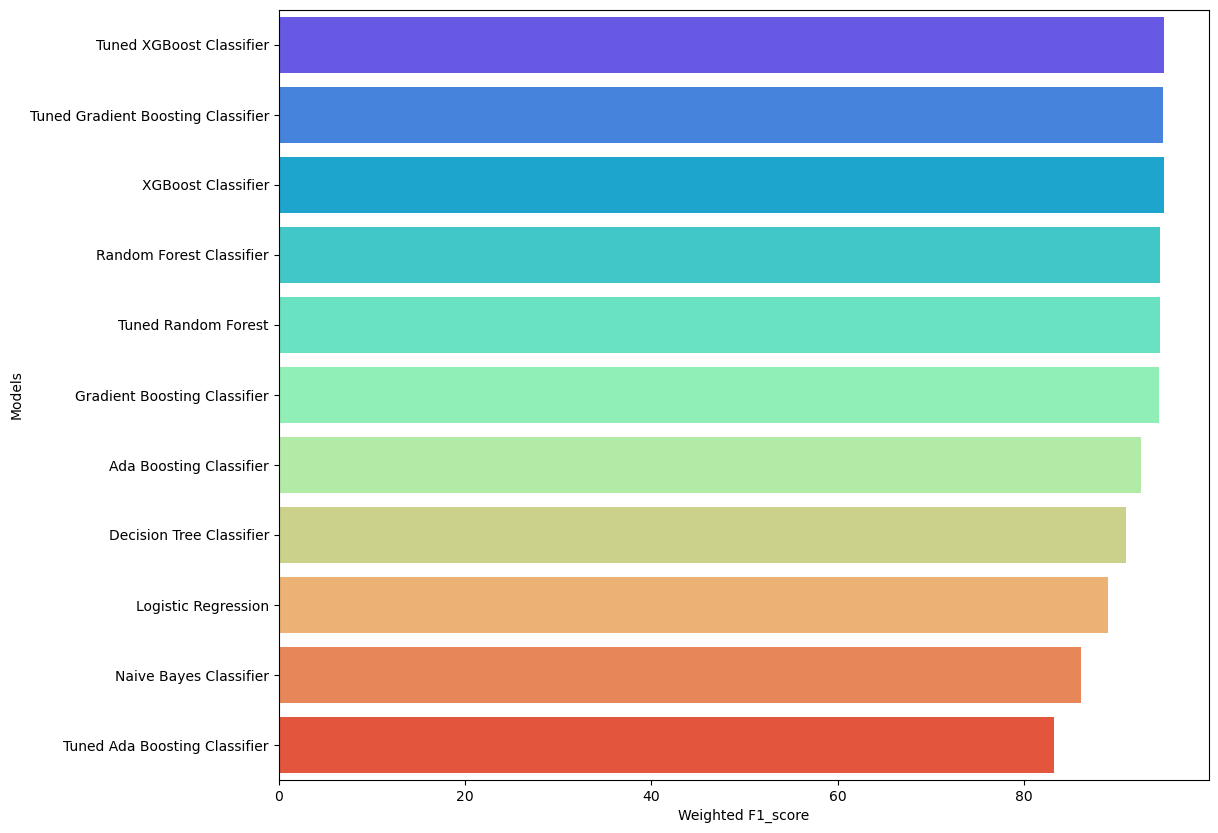

In [175]:
sns.barplot(x=model_comparison_df['Weighted F1_score'],y=model_comparison_df['Models'],palette='rainbow')
plt.show()

In [181]:
# Lets compare our results with ytest
Actual_vs_predicted = pd.DataFrame()
Actual_vs_predicted['Actual']= ytest
Actual_vs_predicted['Predicted']= xg_tuned_pred
print(Actual_vs_predicted.head())
print('*'*50)
print(Actual_vs_predicted.tail())
print('*'*50)
print(Actual_vs_predicted.value_counts())

              Actual  Predicted
Applicant_ID                   
52836              0          0
22157              0          0
17983              0          0
33452              0          0
24862              0          0
**************************************************
              Actual  Predicted
Applicant_ID                   
9431               0          0
1588               0          0
16419              0          0
27017              0          0
36184              0          0
**************************************************
Actual  Predicted
0       0            14945
1       1             1826
        0              679
0       1              143
Name: count, dtype: int64


### Conclusions:
Top Performers: The Tuned XGBoost Classifier and Tuned Gradient Boosting Classifier outperformed all other models in terms of both accuracy and F1 score, with Tuned XGBoost slightly ahead.
Stable Performers: The Random Forest Classifier and Tuned Random Forest maintained the same accuracy and F1 score, indicating stable performance with no significant gain from tuning.
Underperforming Models: The Tuned Ada Boosting Classifier showed a noticeable decline in both accuracy and F1 score, suggesting that the tuning did not yield favorable results for this model.
Naive Bayes and Logistic Regression: Both models performed the lowest in terms of accuracy and F1 score, with Naive Bayes showing better F1 scores than Logistic Regression but still underperforming compared to others.

### Business Interpretation:
Prioritize XGBoost and Gradient Boosting: For applications where prediction accuracy is critical, the Tuned XGBoost Classifier and Tuned Gradient Boosting Classifier should be the models of choice due to their superior performance.
Random Forest: Random Forest offers a reliable baseline model, with performance stability, but does not provide significant improvements through tuning in this case.
Avoid AdaBoost Tuning: The Tuned AdaBoost model performed worse after tuning, suggesting that the model may not be suitable for this particular dataset or problem when hyperparameters are adjusted.
Consider Simpler Models for Efficiency: For cases where computational resources are limited or interpretability is key, Logistic Regression and Decision Tree Classifier could be considered, though they are not as accurate.